In [5]:
import os as os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plot 
plot.style.use("fivethirtyeight")# Above is a special style template for matplotlib, highly useful for visualizing time series data

%matplotlib inline
from pylab import rcParams
#from plotly import tools
#import plotly.plotly as py
#from plotly.offline import init_notebook_mode,iplot
#init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error
#print(os.listdir("../input"))


In [7]:
os.chdir("C:/Users/Garima/Downloads/Edwisor/Time Series")

In [12]:
google_stock_data = pd.read_csv("GOOGL_2006-01-01_to_2018-01-01.csv", index_col='Date', parse_dates=['Date'])

In [13]:
google_stock_data.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [23]:
humidity_data = pd.read_csv('humidity.csv', index_col='datetime', parse_dates=['datetime'])
humidity_data.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN
2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,62.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,62.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0


Google stocks data doesn't have any missing values but humidity data does have its fair share of missing values. It is cleaned using fillna() method with ffill parameter which propagates last valid observation to fill gaps

In [26]:
humidity_data = humidity_data.iloc[1:]
humidity_data = humidity_data.fillna(method = "ffill")
humidity_data.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,62.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 17:00:00,78.0,79.0,84.0,79.0,88.0,80.0,21.0,24.0,49.0,63.0,...,69.0,57.0,80.0,68.0,54.0,62.0,23.0,51.0,51.0,50.0
2012-10-01 18:00:00,78.0,79.0,83.0,78.0,88.0,80.0,21.0,24.0,49.0,63.0,...,68.0,56.0,76.0,68.0,55.0,63.0,23.0,51.0,51.0,50.0
2012-10-01 19:00:00,79.0,78.0,82.0,77.0,88.0,80.0,21.0,24.0,49.0,63.0,...,68.0,56.0,72.0,68.0,56.0,63.0,23.0,51.0,51.0,50.0


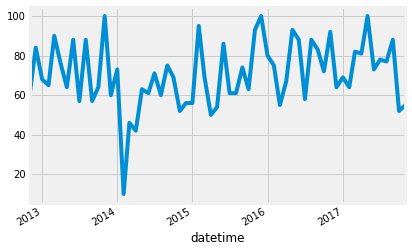

In [27]:
#visualising the data set 
humidity_data['Kansas City'].asfreq("M").plot()# asfreq method is used to convert a time series to a specified frequency. Here it is monthly frequency.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022615BED400>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000022615E858D0>], dtype=object)

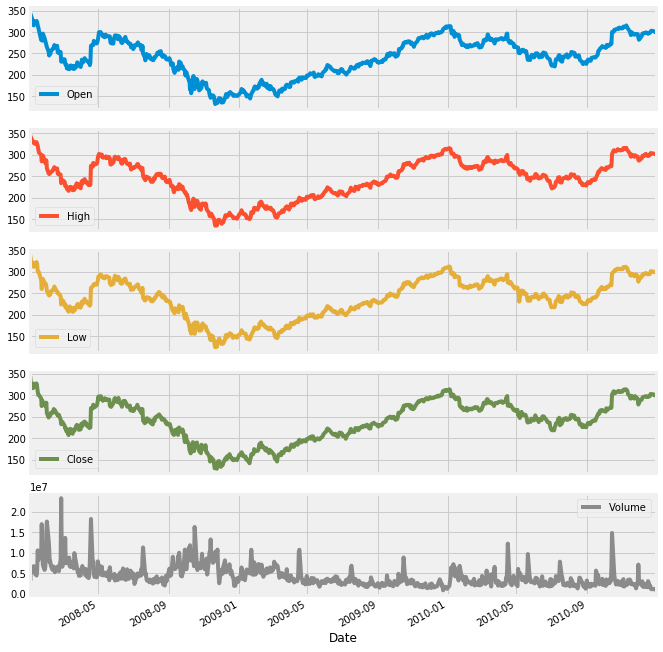

In [31]:
google_stock_data['2008':'2010'].plot(subplots = True,figsize = (10,12))## subplots = True makes different plots of the open, high, low,
#close , and volume else they will overlap


In [36]:
##Timestamp represents a point in time whereas period represents interval 
timestamp = pd.Timestamp(2017,1,1,12)
timestamp

Timestamp('2017-01-01 12:00:00')

In [39]:
period = pd.Period('2017-01-01')
period

Period('2017-01-01', 'D')

In [40]:
## check whhther the given timestamp is in the period 
period.start_time<timestamp<period.end_time

True

In [42]:
## True , converting the timestamp to period 
new_period = timestamp.to_period(freq = 'H')
new_period

Period('2017-01-01 12:00', 'H')

In [44]:
## converting period to timestamp 
new_timestamp = period.to_timestamp(freq = 'H',how = 'start')
new_timestamp

Timestamp('2017-01-01 00:00:00')

In [46]:
## date_range returns fixed frequency datetmeindex 
## we can create our own time series attribute using this 
date_range1 = pd.date_range(start = '1/1/18',end = '1/9/18')
date_range1

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09'],
              dtype='datetime64[ns]', freq='D')

In [48]:
#monthly frequency 
date_range2 = pd.date_range(start = '1/1/18',end = '1/1/19',freq = 'M')
date_range2

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', freq='M')

In [54]:
# Creating a datetimeindex without specifying start date and using periods
date_range3 = pd.date_range(end='1/4/2014', periods=8)
date_range3

DatetimeIndex(['2013-12-28', '2013-12-29', '2013-12-30', '2013-12-31',
               '2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04'],
              dtype='datetime64[ns]', freq='D')

In [65]:
# Creating a datetimeindex specifying start date , end date and periods
#date_range4 = pd.date_range(start='2013-04-24', end='2014-11-27', periods=3)
#date_range4

ValueError: Must specify two of start, end, or periods

In [67]:
#to_datetime 
df = pd.DataFrame({'year':[2015,2016],'month':[2,3],'day':[4,5]})
df = pd.to_datetime(df)
df

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

In [68]:
df = pd.to_datetime('01-01-2017')
df

Timestamp('2017-01-01 00:00:00')

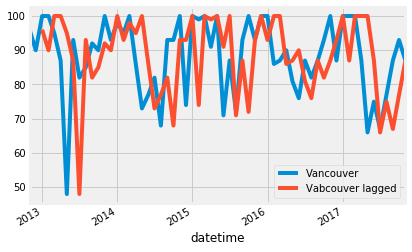

In [71]:
#Shifting and lags : compare timeseries data 
humidity_data['Vancouver'].asfreq('M').plot(legend = True)
shifted = humidity_data['Vancouver'].asfreq('M').shift(2).plot(legend = True)
shifted.legend(['Vancouver','Vabcouver lagged'])

1.8 Resampling
Upsampling - Time series is resampled from low frequency to high frequency(Monthly to daily frequency). It involves filling or interpolating missing data

Downsampling - Time series is resampled from high frequency to low frequency(Weekly to monthly frequency). It involves aggregation of existing data.

In [93]:
pressure_data = pd.read_csv("pressure.csv",index_col = "datetime",parse_dates = ['datetime'])
pressure_data.head()
## fill na 

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1011.0,NaN,NaN,NaN
2012-10-01 13:00:00,NaN,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,1001.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 14:00:00,NaN,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,986.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 15:00:00,NaN,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,945.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 16:00:00,NaN,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,904.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0


In [94]:
#First, we used ffill parameter which propagates last valid observation to fill gaps. Then we use bfill to propogate next valid observation to fill gaps.
pressure_data = pressure_data[1:]
pressure_data = pressure_data.fillna(method = "ffill")
pressure_data = pressure_data.fillna(method = 'bfill')
pressure_data

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 13:00:00,807.0,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,1001.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 14:00:00,807.0,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,986.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 15:00:00,807.0,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,945.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 16:00:00,807.0,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,904.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 17:00:00,807.0,1024.0,1009.0,1029.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,863.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 18:00:00,807.0,1024.0,1010.0,1030.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,822.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 19:00:00,807.0,1024.0,1010.0,1031.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,822.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 20:00:00,807.0,1024.0,1010.0,1031.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,822.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 21:00:00,807.0,1024.0,1010.0,1032.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,822.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0


In [95]:
pressure_data.shape

(45252, 36)

In [96]:
#shape before resampling 
pressure_data = pressure_data.resample('3D').mean()## We downsample from hourly to 3 day frequency aggregated using mean
pressure_data.shape

(629, 36)

In [97]:
pressure_data

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 13:00:00,946.652778,1022.597222,1010.666667,1030.666667,1011.472222,1011.875000,1015.305556,1011.805556,1021.722222,1022.347222,...,1014.388889,1013.875000,952.013889,1014.291667,985.388889,1013.277778,1012.208333,1013.000000,1013.000000,990.611111
2012-10-04 13:00:00,1018.875000,1022.819444,1016.027778,1027.527778,1016.208333,1016.888889,1013.597222,1014.486111,1019.930556,1022.375000,...,1017.763889,1017.083333,1015.680556,1019.555556,984.486111,1012.791667,1012.277778,1013.000000,1013.000000,989.902778
2012-10-07 13:00:00,1014.125000,1016.652778,1016.527778,1017.472222,1013.388889,1014.347222,1012.500000,1011.652778,1005.875000,1018.541667,...,1019.666667,1018.652778,1017.013889,1016.805556,982.833333,1012.902778,1007.500000,1013.000000,1013.000000,989.722222
2012-10-10 13:00:00,1011.375000,1014.513889,1014.416667,1017.472222,1009.916667,1013.750000,997.625000,1004.125000,978.263889,977.722222,...,1017.958333,1016.916667,1014.083333,1017.652778,979.305556,1005.847222,995.013889,1012.333333,1012.333333,988.013889
2012-10-13 13:00:00,1010.208333,1018.694444,1021.888889,1016.152778,1017.972222,1018.347222,1019.611111,1017.527778,1022.652778,1018.888889,...,1023.930556,1023.486111,1019.458333,1023.138889,985.333333,1014.111111,1011.027778,1013.000000,1013.000000,990.750000
2012-10-16 13:00:00,1013.583333,1018.763889,1013.861111,1018.444444,1009.750000,1010.083333,1014.375000,1011.805556,1017.708333,1012.236111,...,1011.736111,1010.916667,1005.888889,1011.861111,985.402778,1013.944444,1009.833333,1013.000000,1013.000000,990.541667
2012-10-19 13:00:00,1010.277778,1013.569444,1013.722222,1011.222222,985.833333,1014.305556,1011.972222,983.875000,989.375000,1012.750000,...,1009.472222,1009.944444,969.069444,1012.486111,982.013889,1010.513889,1003.416667,1012.611111,1012.611111,987.638889
2012-10-22 13:00:00,1005.680556,1008.375000,1013.763889,1008.625000,1013.680556,1014.833333,1005.680556,1010.111111,1010.208333,1004.319444,...,1018.861111,1017.680556,1016.250000,1019.777778,983.458333,1012.055556,1005.930556,1012.944444,1012.944444,989.180556
2012-10-25 13:00:00,1018.666667,1022.888889,1021.708333,1022.097222,1015.319444,1015.791667,1019.388889,1014.666667,1020.250000,1008.930556,...,1021.430556,1021.916667,1021.027778,1022.083333,982.638889,1011.527778,1003.777778,1012.847222,1012.847222,988.291667


In [100]:
## reverse by upsample to daily basis 
pressure_data = pressure_data.resample('D').pad()
pressure_data

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-02,946.652778,1022.597222,1010.666667,1030.666667,1011.472222,1011.875000,1015.305556,1011.805556,1021.722222,1022.347222,...,1014.388889,1013.875000,952.013889,1014.291667,985.388889,1013.277778,1012.208333,1013.000000,1013.000000,990.611111
2012-10-03,946.652778,1022.597222,1010.666667,1030.666667,1011.472222,1011.875000,1015.305556,1011.805556,1021.722222,1022.347222,...,1014.388889,1013.875000,952.013889,1014.291667,985.388889,1013.277778,1012.208333,1013.000000,1013.000000,990.611111
2012-10-04,946.652778,1022.597222,1010.666667,1030.666667,1011.472222,1011.875000,1015.305556,1011.805556,1021.722222,1022.347222,...,1014.388889,1013.875000,952.013889,1014.291667,985.388889,1013.277778,1012.208333,1013.000000,1013.000000,990.611111
2012-10-05,1018.875000,1022.819444,1016.027778,1027.527778,1016.208333,1016.888889,1013.597222,1014.486111,1019.930556,1022.375000,...,1017.763889,1017.083333,1015.680556,1019.555556,984.486111,1012.791667,1012.277778,1013.000000,1013.000000,989.902778
2012-10-06,1018.875000,1022.819444,1016.027778,1027.527778,1016.208333,1016.888889,1013.597222,1014.486111,1019.930556,1022.375000,...,1017.763889,1017.083333,1015.680556,1019.555556,984.486111,1012.791667,1012.277778,1013.000000,1013.000000,989.902778
2012-10-07,1018.875000,1022.819444,1016.027778,1027.527778,1016.208333,1016.888889,1013.597222,1014.486111,1019.930556,1022.375000,...,1017.763889,1017.083333,1015.680556,1019.555556,984.486111,1012.791667,1012.277778,1013.000000,1013.000000,989.902778
2012-10-08,1014.125000,1016.652778,1016.527778,1017.472222,1013.388889,1014.347222,1012.500000,1011.652778,1005.875000,1018.541667,...,1019.666667,1018.652778,1017.013889,1016.805556,982.833333,1012.902778,1007.500000,1013.000000,1013.000000,989.722222
2012-10-09,1014.125000,1016.652778,1016.527778,1017.472222,1013.388889,1014.347222,1012.500000,1011.652778,1005.875000,1018.541667,...,1019.666667,1018.652778,1017.013889,1016.805556,982.833333,1012.902778,1007.500000,1013.000000,1013.000000,989.722222


In [104]:
google_stock_data.High

Date
2006-01-03     218.05
2006-01-04     224.70
2006-01-05     226.00
2006-01-06     235.49
2006-01-09     236.94
2006-01-10     235.36
2006-01-11     237.79
2006-01-12     237.73
2006-01-13     233.68
2006-01-17     235.18
2006-01-18     228.91
2006-01-19     226.97
2006-01-20     220.24
2006-01-23     214.41
2006-01-24     222.70
2006-01-25     227.34
2006-01-26     220.22
2006-01-27     219.33
2006-01-30     216.86
2006-01-31     220.02
2006-02-01     201.20
2006-02-02     203.45
2006-02-03     197.15
2006-02-06     195.14
2006-02-07     192.04
2006-02-08     185.53
2006-02-09     187.39
2006-02-10     182.43
2006-02-13     175.48
2006-02-14     176.02
               ...   
2017-11-16    1051.76
2017-11-17    1051.00
2017-11-20    1038.70
2017-11-21    1050.39
2017-11-22    1055.43
2017-11-24    1060.07
2017-11-27    1073.04
2017-11-28    1080.00
2017-11-29    1058.77
2017-11-30    1044.14
2017-12-01    1037.24
2017-12-04    1031.34
2017-12-05    1036.68
2017-12-06    1039.58
2017-

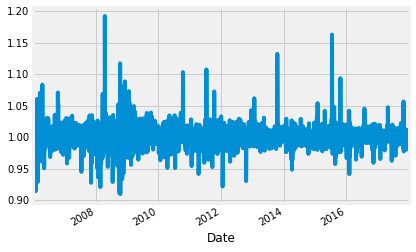

In [115]:
google_stock_data.High.shift()## shifts by one step 
## we take the percent change by comparing the current high value 
google['Change'] = google.High.div(google.High.shift())
google.Change.plot()

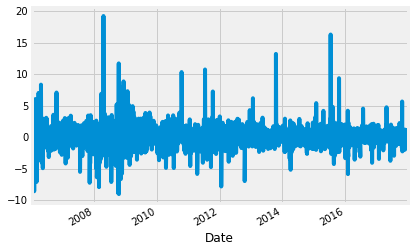

In [118]:
##Stock Returns 
#subtract 1 and multiply by 100
google.Change.sub(1).mul(100).plot()

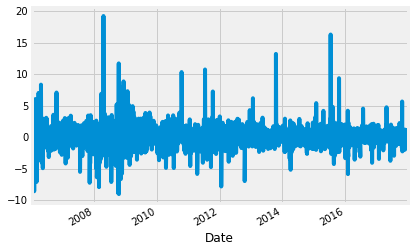

In [119]:
#or using inbuilt pct_change
google.High.pct_change().mul(100).plot()

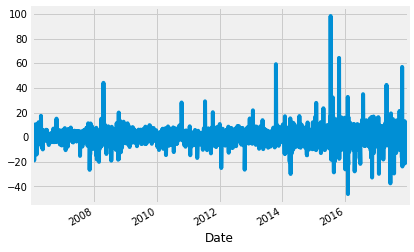

In [120]:
#absolute change in successive rows 
google.High.diff().plot()

Comparing two or more time series data 

In [121]:
microsoft_data = pd.read_csv("MSFT_2006-01-01_to_2018-01-01.csv",index_col="Date",parse_dates=['Date'])

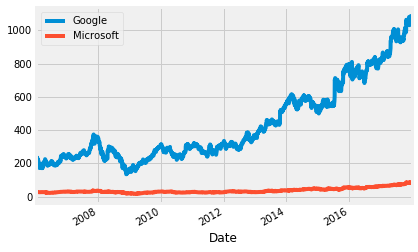

In [123]:
## plotting before normalisation
google_stock_data.High.plot()
microsoft_data.High.plot()
plot.legend(["Google","Microsoft"])

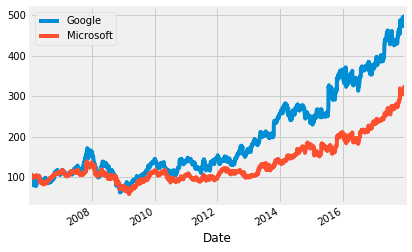

In [127]:
# Normalizing and comparison
# Both stocks start from 100
normalized_google = google_stock_data.High.div(google_stock_data.High.iloc[0]).mul(100)
normalized_microsoft = microsoft_data.High.div(microsoft_data.High.iloc[0]).mul(100)
normalized_google.plot()
normalized_microsoft.plot()
plot.legend(['Google','Microsoft'])

In [128]:
google.High

Date
2006-01-03     218.05
2006-01-04     224.70
2006-01-05     226.00
2006-01-06     235.49
2006-01-09     236.94
2006-01-10     235.36
2006-01-11     237.79
2006-01-12     237.73
2006-01-13     233.68
2006-01-17     235.18
2006-01-18     228.91
2006-01-19     226.97
2006-01-20     220.24
2006-01-23     214.41
2006-01-24     222.70
2006-01-25     227.34
2006-01-26     220.22
2006-01-27     219.33
2006-01-30     216.86
2006-01-31     220.02
2006-02-01     201.20
2006-02-02     203.45
2006-02-03     197.15
2006-02-06     195.14
2006-02-07     192.04
2006-02-08     185.53
2006-02-09     187.39
2006-02-10     182.43
2006-02-13     175.48
2006-02-14     176.02
               ...   
2017-11-16    1051.76
2017-11-17    1051.00
2017-11-20    1038.70
2017-11-21    1050.39
2017-11-22    1055.43
2017-11-24    1060.07
2017-11-27    1073.04
2017-11-28    1080.00
2017-11-29    1058.77
2017-11-30    1044.14
2017-12-01    1037.24
2017-12-04    1031.34
2017-12-05    1036.68
2017-12-06    1039.58
2017-

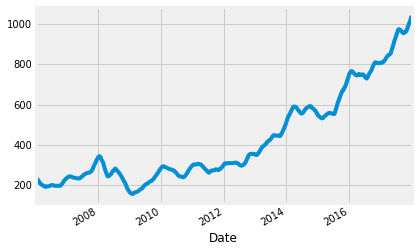

In [133]:
rolling_google = google.High.rolling('90D').mean()##it will take mean of the past 90 days observation including the ith observation
rolling_google.plot()
#Now, observe that rolling mean plot is a smoother version of the original plot.

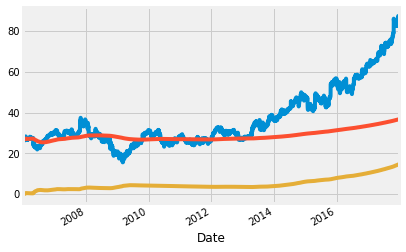

In [136]:
##expanding 
microsoft_mean = microsoft_data.High.expanding().mean()
microsoft_std = microsoft_data.High.expanding().std()
microsoft_data.High.plot()
microsoft_mean.plot()
microsoft_std.plot()


In [138]:
#trace = go.Ohlc(x=google_stock_data['06-2008'].index,
#                open=google_stock_data['06-2008'].Open,
#                high=google_stock_data['06-2008'].High,
#                low=google_stock_data['06-2008'].Low,
#                close=google_stock_data['06-2008'].Close)
#data = [trace]
#iplot(data, filename='simple_ohlc')

NameError: name 'go' is not defined

In [139]:
# Candlestick chart of march 2008
#trace = go.Candlestick(x=google['03-2008'].index,
#                open=google['03-2008'].Open,
#                high=google['03-2008'].High,
#                low=google['03-2008'].Low,
#                close=google['03-2008'].Close)
#data = [trace]
#iplot(data, filename='simple_candlestick')

NameError: name 'go' is not defined

PACF

Suppose you have 3 points in a time series x3 - x2 - x1. Using ACF you would generally find the correlation between x1 and x2 , for example. The value of correlation thus obtained is technically not true value of correlation, because the value of x2 is likely to be inspired by the value of x3. 

So PACF is that portion of the correlation between x1 and x2, which is not explained by the correlation between x3 in x2.

Graphically,  lets say, the correlation between x1 and x2 is given by the PINK box(including the GREEN box), and the correlation between x2 and x3 is given by the GREEN box. So the partial correlation of x1 and x2 is the original correlation minus the correlation of x2 and x3(GREEN box), which is just the PINK Pentagon.
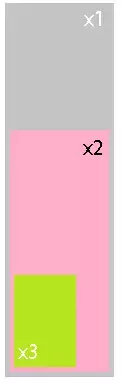

https://www.quora.com/What-is-the-difference-among-auto-correlation-partial-auto-correlation-and-inverse-auto-correlation-while-modelling-an-ARIMA-series


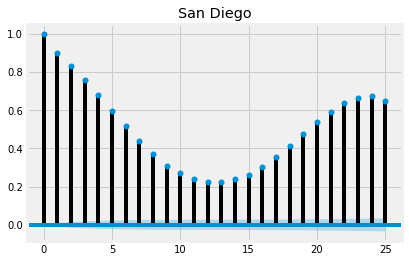

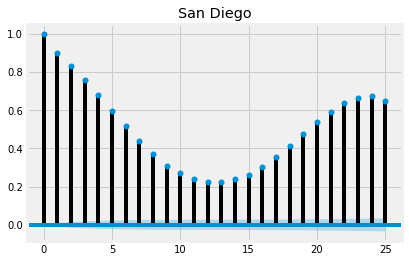

In [141]:
plot_acf(humidity_data["San Diego"],lags=25,title="San Diego")
#As all lags are either close to 1 or at least greater than the confidence interval, they are statistically significant.

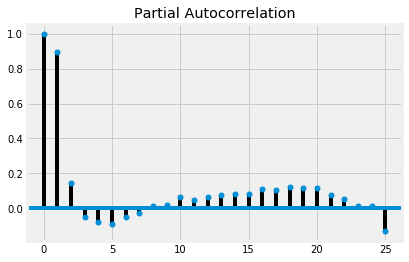

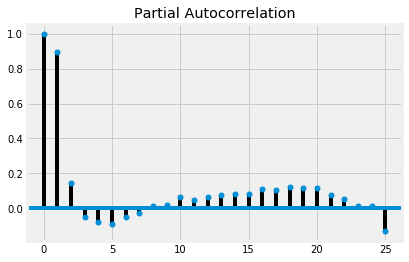

In [143]:
# Partial Autocorrelation of humidity of San Diego
plot_pacf(humidity_data["San Diego"],lags=25)
#Though it is statistically signficant, partial autocorrelation after first 2 lags is very low.

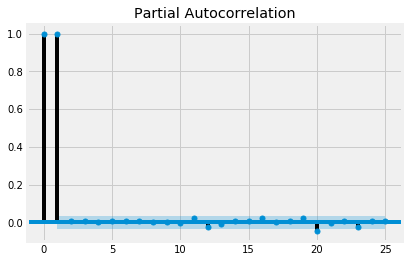

In [146]:
# Partial Autocorrelation of closing price of microsoft stocks
plot_pacf(microsoft_data["Close"],lags=25)
plot.show()
#Here, only 0th, 1st and 20th lag are statistically significant.

3. Time series decomposition and Random walks
3.1. Trends, seasonality and noise
These are the components of a time series

Trend - Consistent upwards or downwards slope of a time series
Seasonality - Clear periodic pattern of a time series(like sine funtion)
Noise - Outliers or missing values

# Trend

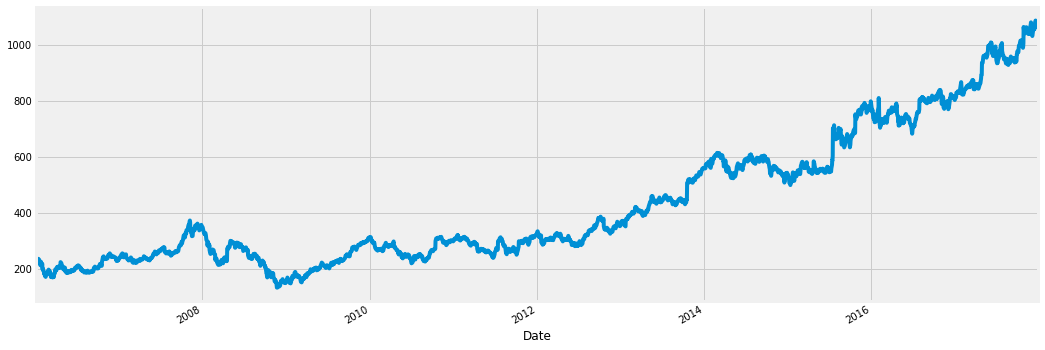

In [155]:
# Let's take Google stocks High for this
google_stock_data["High"].plot()

# Seasonality 

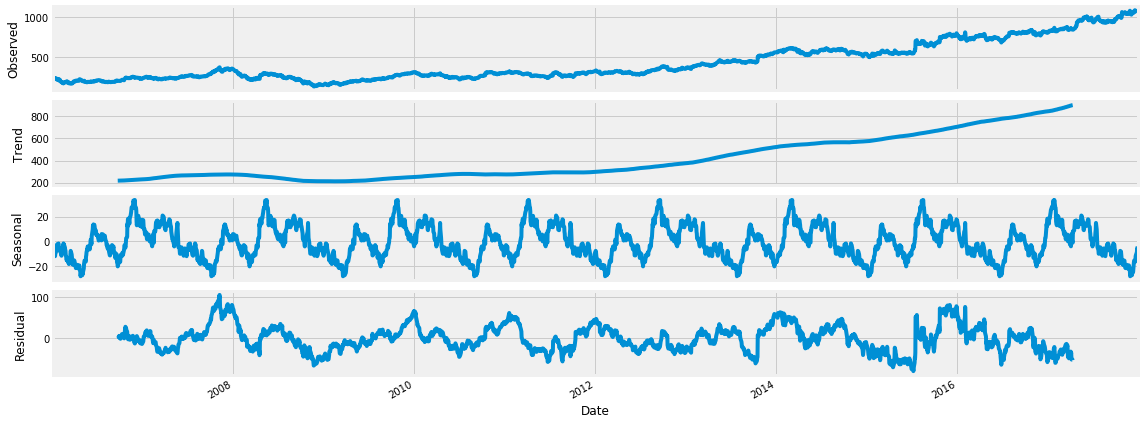

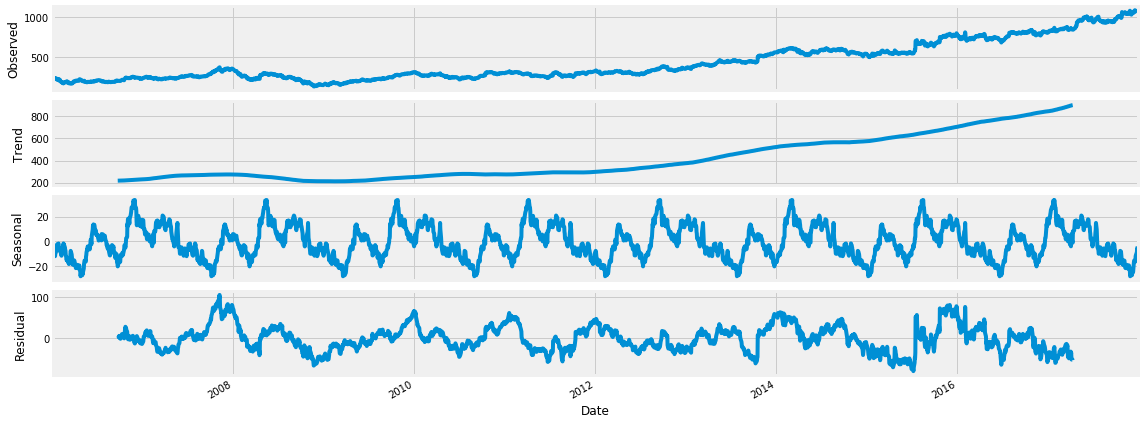

In [159]:
# Now, for decomposition...
decomposed_google_volume = sm.tsa.seasonal_decompose(google_stock_data["High"],freq=365) # The frequncy is annual
decomposed_google_volume.plot()

#### There is clearly an upward trend in the above plot.
#### You can also see the uniform seasonal change.
#### Non-uniform noise that represent outliers and missing values

White noise
White noise has...

Constant mean
Constant variance
Zero auto-correlation at all lags

3.3. Random Walk
A random walk is a mathematical object, known as a stochastic or random process, that describes a path that consists of a succession of random steps on some mathematical space such as the integers.

In general if we talk about stocks, Today's Price = Yesterday's Price + Noise

Pt = Pt-1 + εt
Random walks can't be forecasted because well, noise is random.

Random Walk with Drift(drift(μ) is zero-mean)

Pt - Pt-1 = μ + εt

Regression test for random walk

Pt = α + βPt-1 + εt
Equivalent to Pt - Pt-1 = α + βPt-1 + εt

Test:

H0: β = 1 (This is a random walk)
H1: β < 1 (This is not a random walk)

Dickey-Fuller Test:

H0: β = 0 (This is a random walk)
H1: β < 0 (This is not a random walk)
Augmented Dickey-Fuller test

An augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. It is basically Dickey-Fuller test with more lagged changes on RHS.

In [148]:
# Augmented Dickey-Fuller test on volume of google and microsoft stocks 
adf = adfuller(microsoft_data["Volume"])
print("p-value of microsoft: {}".format(float(adf[1])))
adf = adfuller(google_stock_data["Volume"])
print("p-value of google: {}".format(float(adf[1])))

p-value of microsoft: 0.0003201525277652073
p-value of google: 6.510719605768313e-07


As microsoft has p-value 0.0003201525 which is less than 0.05, null hypothesis is rejected and this is not a random walk.
Now google has p-value 0.0000006510 which is more than 0.05, null hypothesis is rejected and this is not a random walk.

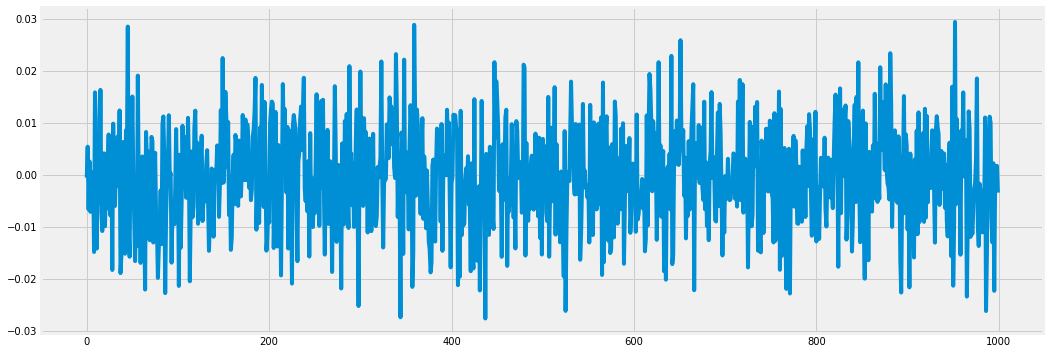

In [152]:
seed(3001)
rcParams['figure.figsize'] = 16,6
random_walk = normal(loc=0,scale=0.01,size=1000)
plot.plot(random_walk)


3.4 Stationarity
A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.

Strong stationarity: is a stochastic process whose unconditional joint probability distribution does not change when shifted in time. Consequently, parameters such as mean and variance also do not change over time.
Weak stationarity: is a process where mean, variance, autocorrelation are constant throughout the time

#### Stationarity is important as non-stationary series that depend on time have too many parameters to account for when modelling the time series. diff() method can easily convert a non-stationary series to a stationary series.

We will try to decompose seasonal component of the above decomposed time series.

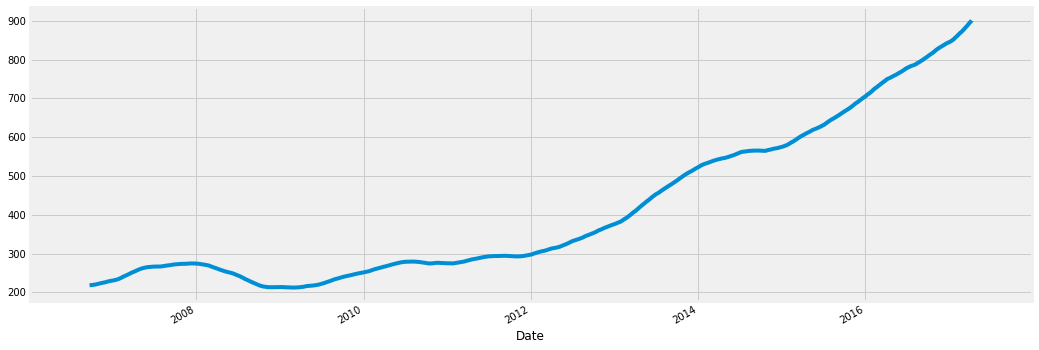

In [163]:
## The original non-stationary plot
decomposed_google_volume.trend.plot()

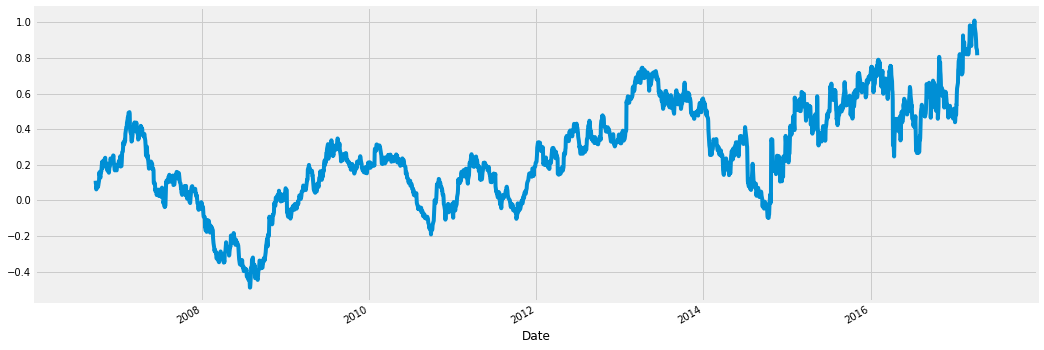

In [162]:
## Converted to stationary process using diff()
decomposed_google_volume.trend.diff().plot()

# 4. Modelling using statstools

4.1 AR models
An autoregressive (AR) model is a representation of a type of random process; as such, it is used to describe certain time-varying processes in nature, economics, etc. The autoregressive model specifies that the output variable depends linearly on its own previous values and on a stochastic term (an imperfectly predictable term); thus the model is in the form of a stochastic difference equation.

AR(1) model
Rt = μ + ϕRt-1 + εt

As RHS has only one lagged value(Rt-1)this is called AR model of order 1 where μ is mean and ε is noise at time t
If ϕ = 1, it is random walk. Else if ϕ = 0, it is white noise. Else if -1 < ϕ < 1, it is stationary. If ϕ is -ve, there is men reversion. If ϕ is +ve, there is momentum.

AR(2) model
Rt = μ + ϕ1Rt-1 + ϕ2Rt-2 + εt

AR(3) model
Rt = μ + ϕ1Rt-1 + ϕ2Rt-2 + ϕ3Rt-3 + εt

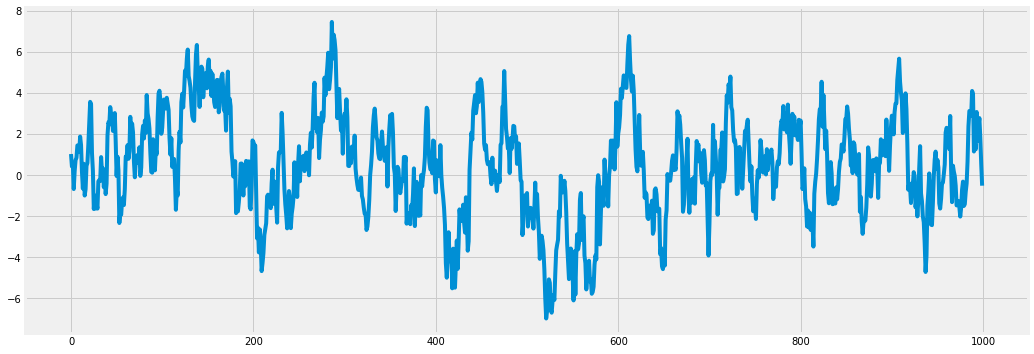

In [166]:
##Simulating AR(1) model
ar1 = np.array([1, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma1 = np.array([1])
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample=1000)
plot.plot(sim1)

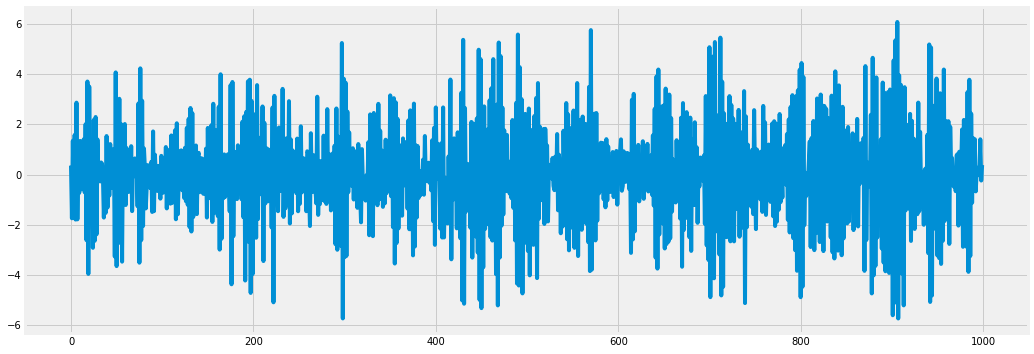

In [167]:
ar2 = np.array([1, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma2 = np.array([1])
AR2 = ArmaProcess(ar2, ma2)
sim2 = AR2.generate_sample(nsample=1000)
plot.plot(sim2)

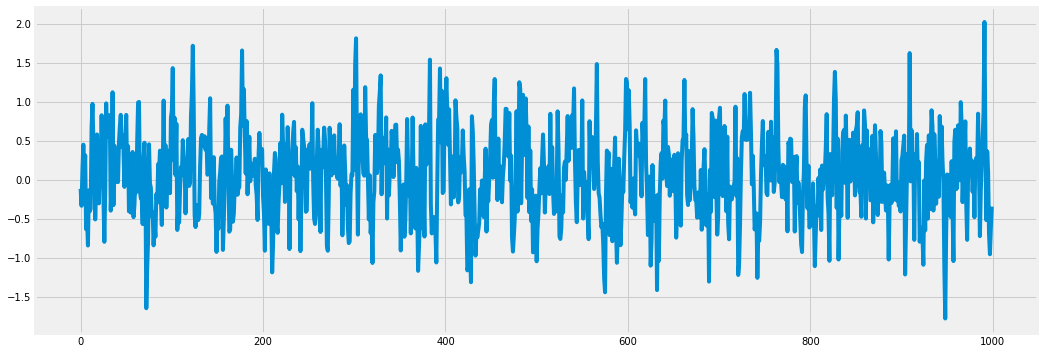

In [168]:
ar3 = np.array([2, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma3 = np.array([1])
AR3 = ArmaProcess(ar3, ma3)
sim3 = AR3.generate_sample(nsample=1000)
plot.plot(sim3)

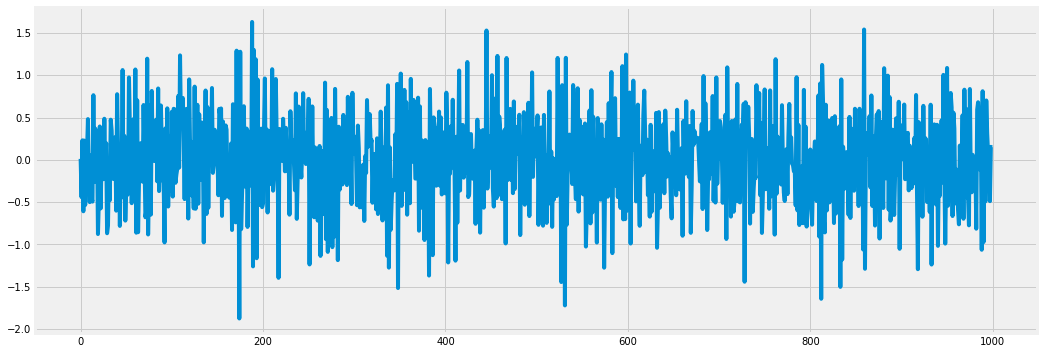

In [169]:
ar4 = np.array([2, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma4 = np.array([1])
AR4 = ArmaProcess(ar4, ma4)
sim4 = AR4.generate_sample(nsample=1000)
plot.plot(sim4)

In [170]:
model = ARMA(sim1, order=(1,0))
result = model.fit()
print(result.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1413.029
Method:                       css-mle   S.D. of innovations              0.993
Date:                Wed, 30 Jan 2019   AIC                           2832.057
Time:                        16:05:28   BIC                           2846.781
Sample:                             0   HQIC                          2837.653
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4451      0.361      1.232      0.218      -0.263       1.153
ar.L1.y        0.9139      0.013     71.924      0.000       0.889       0.939
                                    Roots           

In [171]:
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))
#ϕ is around 0.9 which is what we chose as AR parameter in our first simulated model.

μ=0.44512568327071533 ,ϕ=0.913947090777549


# Predicting the models


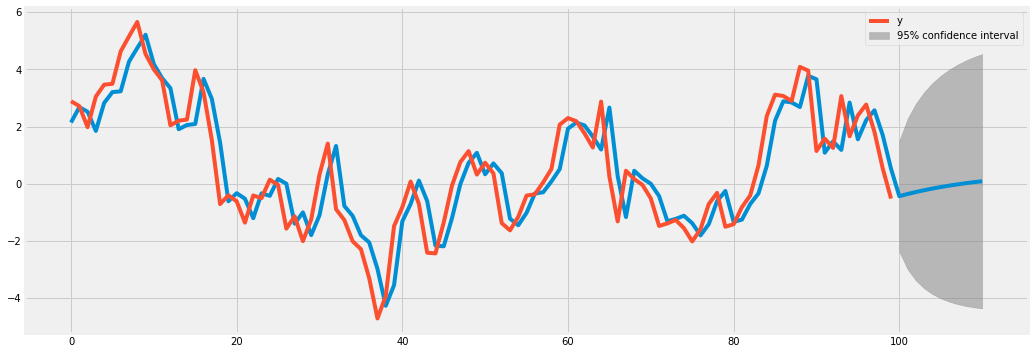

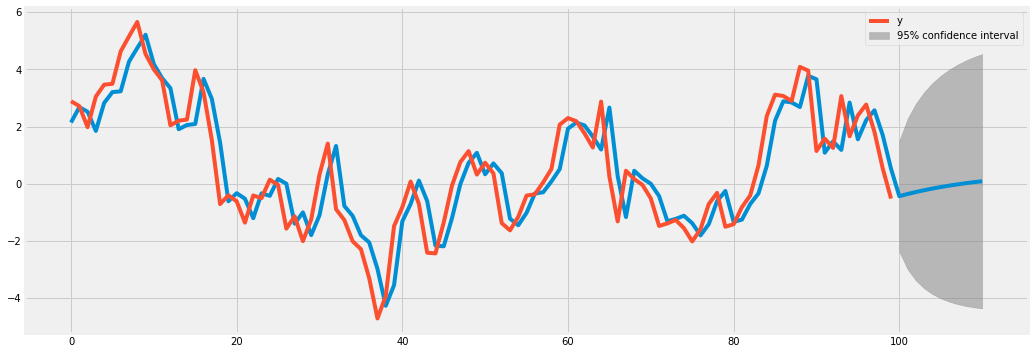

In [174]:
# Predicting simulated AR(1) model 
result.plot_predict(start=900, end=1010)


In [176]:
rmse = math.sqrt(mean_squared_error(sim1[900:1011], result.predict(start=900,end=999)))
rmse## pretty good prediction 

0.9964627488529533

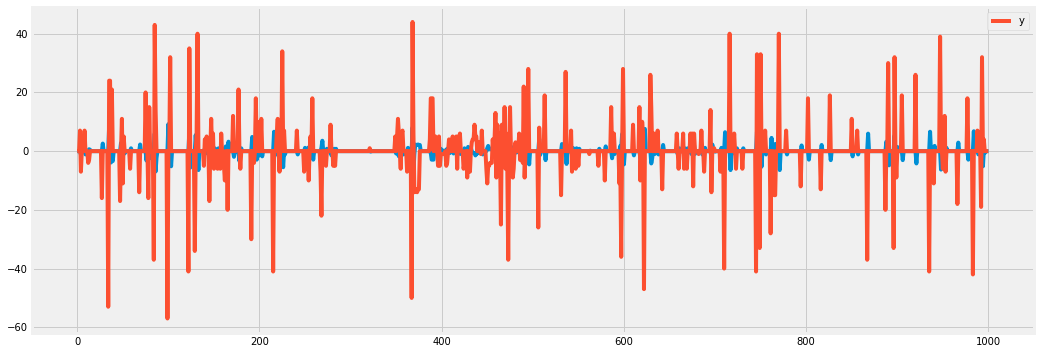

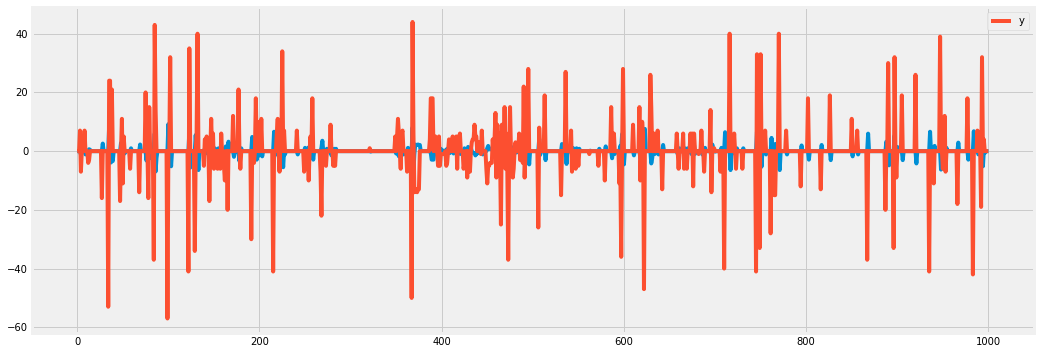

In [181]:
#Predicting humidity level of Montreal 
humid_pred = ARMA(humidity_data['Montreal'].diff().iloc[1:].values,order = (1,0))
res = humid_pred.fit()
res.plot_predict(start = 100,end = 1100)

In [184]:
rmse = math.sqrt(mean_squared_error(humidity_data["Montreal"].diff().iloc[900:1000].values, result.predict(start=900,end=999)))
rmse ##quite large

8.001870756441697

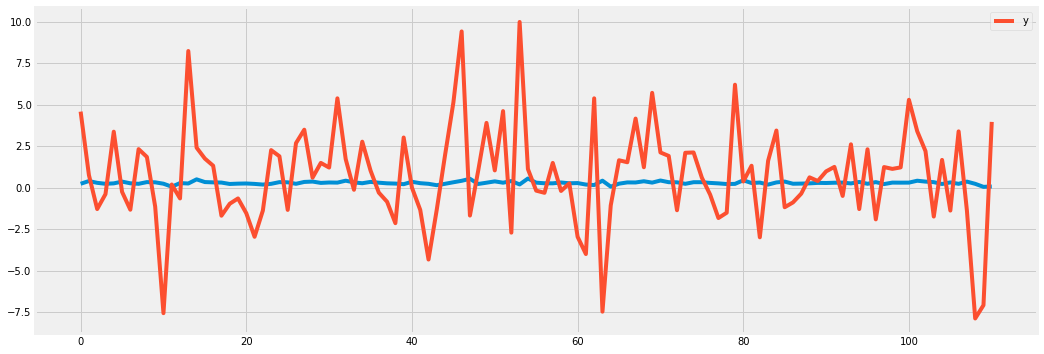

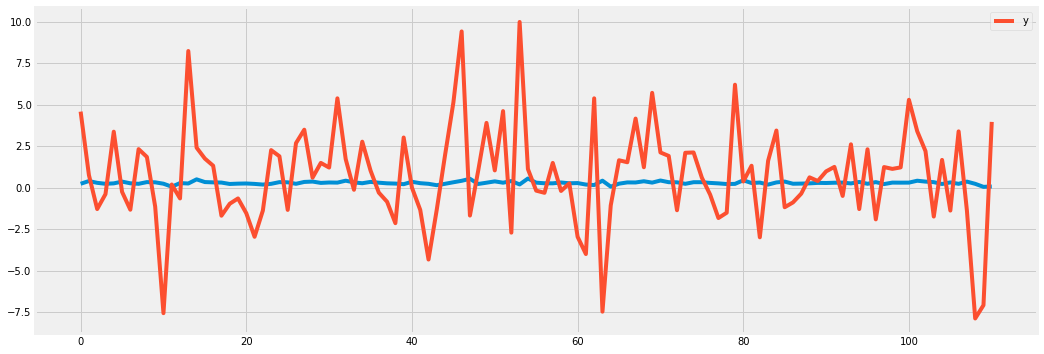

In [185]:
# Predicting closing prices of google
humid = ARMA(google_stock_data["Close"].diff().iloc[1:].values, order=(1,0))
res = humid.fit()
res.plot_predict(start=900, end=1010)## extremely poor fit thus we move to next models 

# 4.2 MA models
The moving-average (MA) model is a common approach for modeling univariate time series. The moving-average model specifies that the output variable depends linearly on the current and various past values of a stochastic (imperfectly predictable) term.

MA(1) model
Rt = μ + ϵt1 + θϵt-1

It translates to Today's returns = mean + today's noise + yesterday's noise

As there is only 1 lagged value in RHS, it is an MA model of order 1¶


### Simulating MA(1) model



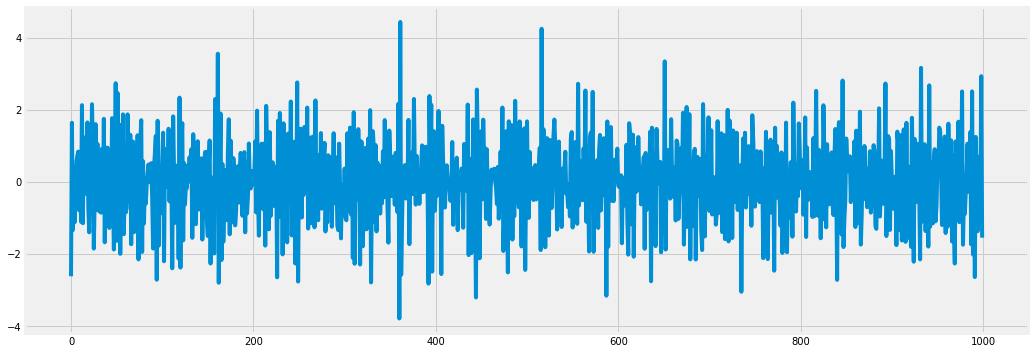

In [188]:
ar1 = np.array([1])
ma1 = np.array([1,-0.5])
MA1 = ArmaProcess(ar1,ma1)
sim1 = MA1.generate_sample(nsample = 1000)
plot.plot(sim1)

# Forecasting the simulated MA model

In [189]:
model = ARMA(sim1,order = (0,1))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1442.916
Method:                       css-mle   S.D. of innovations              1.024
Date:                Wed, 30 Jan 2019   AIC                           2891.831
Time:                        18:40:18   BIC                           2906.554
Sample:                             0   HQIC                          2897.427
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0322      0.016      2.073      0.038       0.002       0.063
ma.L1.y       -0.5204      0.026    -20.230      0.000      -0.571      -0.470
                                    Roots           

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                45249
Model:                     ARMA(0, 3)   Log Likelihood             -153510.970
Method:                       css-mle   S.D. of innovations              7.197
Date:                Wed, 30 Jan 2019   AIC                         307031.939
Time:                        19:22:14   BIC                         307075.539
Sample:                             0   HQIC                        307045.660
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0006      0.031     -0.021      0.983      -0.061       0.060
ma.L1.y       -0.1621      0.005    -34.508      0.000      -0.171      -0.153
ma.L2.y        0.0386      0.005      8.314      0.0

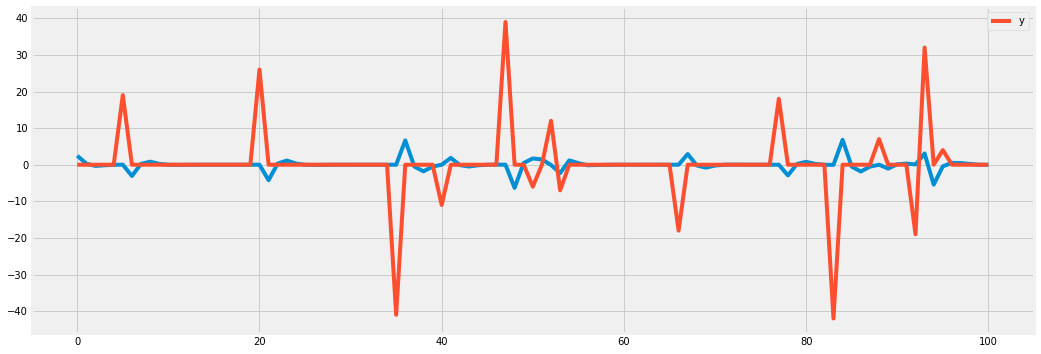

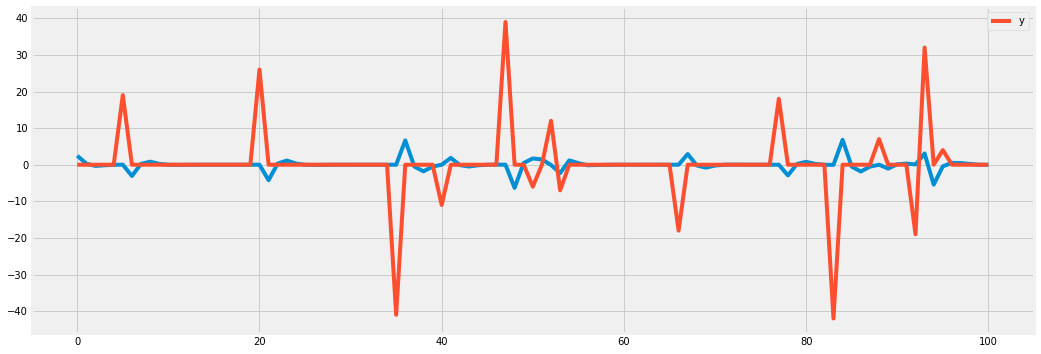

In [192]:
# Forecasting and predicting montreal humidity
model = ARMA(humidity_data["Montreal"].diff().iloc[1:].values, order=(0,3))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))
result.plot_predict(start=1000, end=1100)


In [194]:
rmse = math.sqrt(mean_squared_error(humidity_data["Montreal"].diff().iloc[1000:1101].values, result.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 10.71015107295658.


# Now, for ARMA models.

4.3 ARMA models
Autoregressive–moving-average (ARMA) models provide a parsimonious description of a (weakly) stationary stochastic process in terms of two polynomials, one for the autoregression and the second for the moving average. It's the fusion of AR and MA models.

ARMA(1,1) model

Rt = μ + ϕRt-1 + ϵt + θϵt-1

Basically, Today's return = mean + Yesterday's return + noise + yesterday's noise.

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 3018
Model:                     ARMA(3, 3)   Log Likelihood              -55408.974
Method:                       css-mle   S.D. of innovations       22751607.555
Date:                Wed, 30 Jan 2019   AIC                         110833.948
Time:                        19:35:46   BIC                         110882.047
Sample:                             0   HQIC                        110851.244
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.03e+04   9914.387     -2.047      0.041   -3.97e+04    -865.380
ar.L1.y        0.2053      0.160      1.287      0.198      -0.107       0.518
ar.L2.y        0.7297      0.179      4.081      0.0

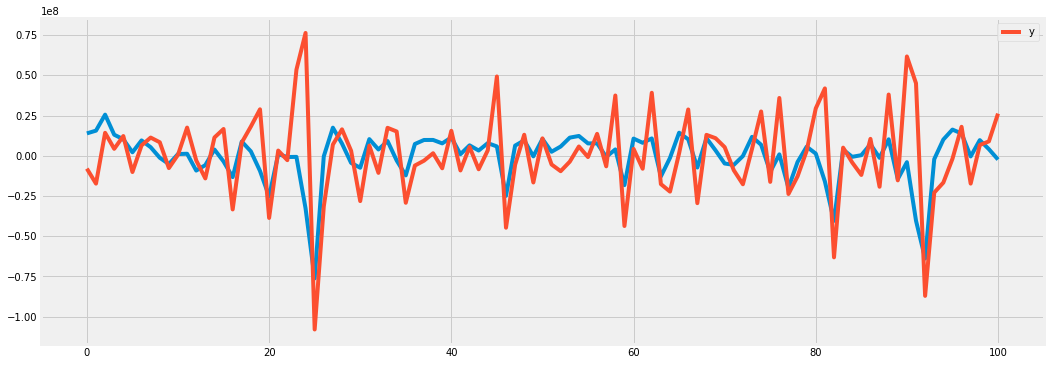

In [197]:
# Forecasting and predicting microsoft stocks volume
model = ARMA(microsoft_data["Volume"].diff().iloc[1:].values, order=(3,3))
result = model.fit()
print(result.summary())
print("μ={}, ϕ={}, θ={}".format(result.params[0],result.params[1],result.params[2]))
result.plot_predict(start=1000, end=1100)
rmse = math.sqrt(mean_squared_error(microsoft_data["Volume"].diff().iloc[1000:1101].values, result.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

# 4.4 ARIMA models
An autoregressive integrated moving average (ARIMA) model is a generalization of an autoregressive moving average (ARMA) model. Both of these models are fitted to time series data either to better understand the data or to predict future points in the series (forecasting). ARIMA models are applied in some cases where data show evidence of non-stationarity, where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity. ARIMA model is of the form: ARIMA(p,d,q): p is AR parameter, d is differential parameter, q is MA parameter

ARIMA(1,0,0)

yt = a1yt-1 + ϵt

ARIMA(1,0,1)

yt = a1yt-1 + ϵt + b1ϵt-1

ARIMA(1,1,1)

Δyt = a1Δyt-1 + ϵt + b1ϵt-1 where Δyt = yt - yt-1

Prediction using ARIMA model

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 3017
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -56385.467
Method:                       css-mle   S.D. of innovations       31647215.008
Date:                Wed, 30 Jan 2019   AIC                         112778.933
Time:                        19:44:56   BIC                         112802.981
Sample:                             1   HQIC                        112787.581
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9984.0302   2.48e+05      0.040      0.968   -4.75e+05    4.95e+05
ar.L1.D.y     -0.8716      0.016    -53.758      0.000      -0.903      -0.840
ar.L2.D.y     -0.4551      0.016    -28.071      0.0

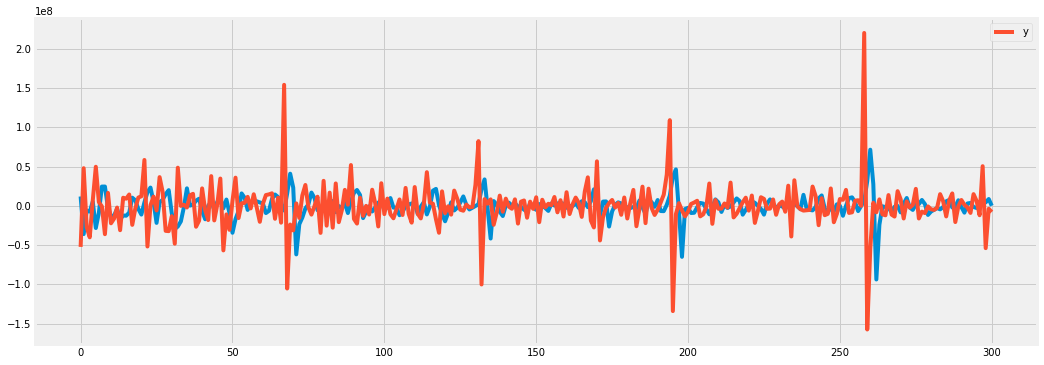

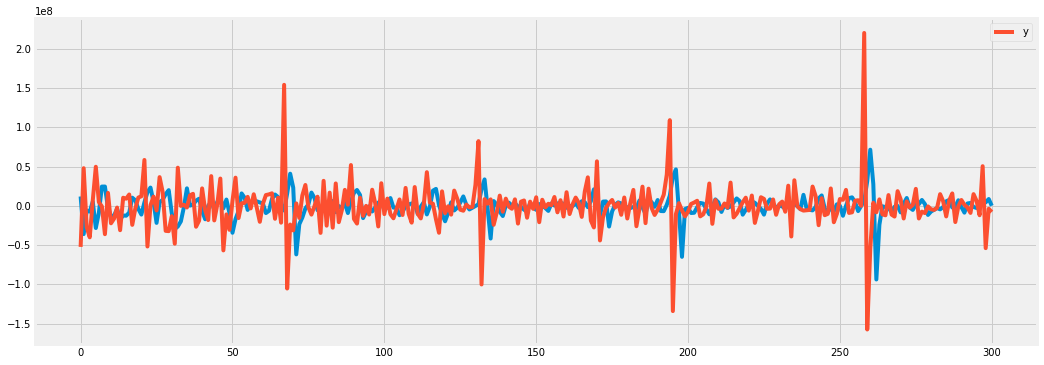

In [198]:
# Predicting the microsoft stocks volume
rcParams['figure.figsize'] = 16, 6
model = ARIMA(microsoft_data["Volume"].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
print(result.summary())
result.plot_predict(start=700, end=1000)

In [199]:
rmse = math.sqrt(mean_squared_error(microsoft_data["Volume"].diff().iloc[700:1001].values, result.predict(start=700,end=1000)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 61937614.65140498.


Taking the slight lag into account, this is a fine model.



# 4.5 VAR models
Vector autoregression (VAR) is a stochastic process model used to capture the linear interdependencies among multiple time series. VAR models generalize the univariate autoregressive model (AR model) by allowing for more than one evolving variable. All variables in a VAR enter the model in the same way: each variable has an equation explaining its evolution based on its own lagged values, the lagged values of the other model variables, and an error term. VAR modeling does not require as much knowledge about the forces influencing a variable as do structural models with simultaneous equations: The only prior knowledge required is a list of variables which can be hypothesized to affect each other intertemporally.

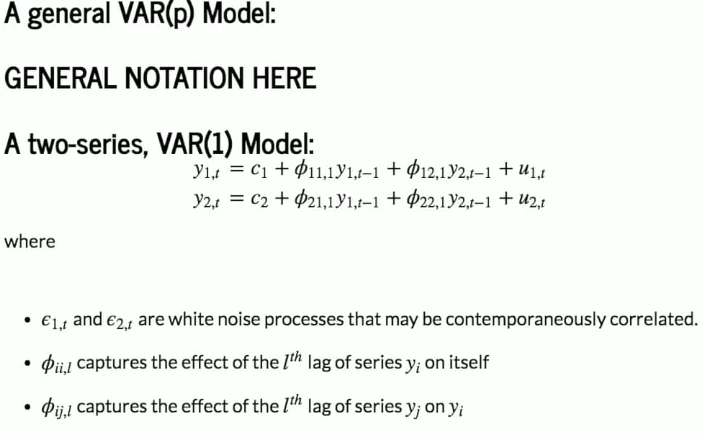

In [202]:
# Predicting closing price of Google and microsoft
train_sample = pd.concat([google_stock_data["Close"].diff().iloc[1:],microsoft_data["Close"].diff().iloc[1:]],axis=1)
model = sm.tsa.VARMAX(train_sample,order=(2,1),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())

                           Statespace Model Results                           
Dep. Variable:     ['Close', 'Close']   No. Observations:                 3018
Model:                     VARMA(2,1)   Log Likelihood              -12185.169
                          + intercept   AIC                          24404.337
Date:                Wed, 30 Jan 2019   BIC                          24506.547
Time:                        21:26:13   HQIC                         24441.091
Sample:                    01-04-2006                                         
                         - 12-29-2017                                         
Covariance Type:                  opg                                         
Ljung-Box (Q):                77.92, 70.42   Jarque-Bera (JB):   55729.45, 15360.72
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         3.35, 1.82   Skew:                       1.24, 0.29
Prob(H) (two-sided):            0.00,

The root mean squared error is 3.674368865862957.


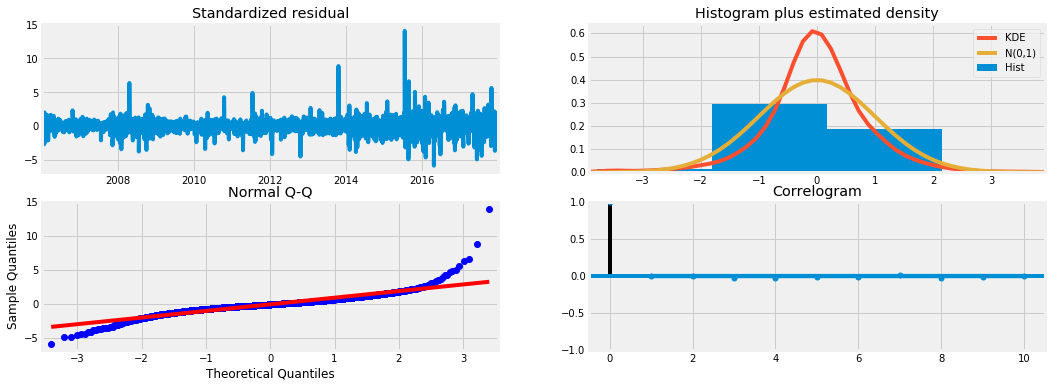

In [203]:
predicted_result = result.predict(start=0, end=1000)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1002].values, predicted_result.values))
print("The root mean squared error is {}.".format(rmse))

4.6 State Space methods
A general state space model is of the form

yt=Ztαt+dt+εt

αt=Ttαt−1+ct+Rtηt

where yt refers to the observation vector at time t, αt refers to the (unobserved) state vector at time t, and where the irregular components are defined as

εt∼N(0,Ht)

ηt∼N(0,Qt)

The remaining variables (Zt,dt,Ht,Tt,ct,Rt,Qt) in the equations are matrices describing the process. Their variable names and dimensions are as follows

Z : design (k_endog×k_states×nobs)

d : obs_intercept (k_endog×nobs)

H : obs_cov (k_endog×k_endog×nobs)

T : transition (k_states×k_states×nobs)

c : state_intercept (k_states×nobs)

R : selection (k_states×k_posdef×nobs)

Q : state_cov (k_posdef×k_posdef×nobs)

In the case that one of the matrices is time-invariant (so that, for example, Zt=Zt+1 ∀ t), its last dimension may be of size 1 rather than size nobs.

This generic form encapsulates many of the most popular linear time series models (see below) and is very flexible, allowing estimation with missing observations, forecasting, impulse response functions, and much more.

Source: statsmodels

4.6.1 SARIMA models
SARIMA models are useful for modeling seasonal time series, in which the mean and other statistics for a given season are not stationary across the years. The SARIMA model defined constitutes a straightforward extension of the nonseasonal autoregressive-moving average (ARMA) and autoregressive integrated moving average (ARIMA) models presented

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 3018
Model:               SARIMAX(4, 0, 4)   Log Likelihood              -10109.291
Date:                Wed, 30 Jan 2019   AIC                          20238.582
Time:                        23:29:29   BIC                          20298.705
Sample:                             0   HQIC                         20260.201
                               - 3018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2066      0.149      1.387      0.165      -0.085       0.498
ar.L1         -0.5031      0.241     -2.083      0.037      -0.976      -0.030
ar.L2          0.5260      0.201      2.612      0.0

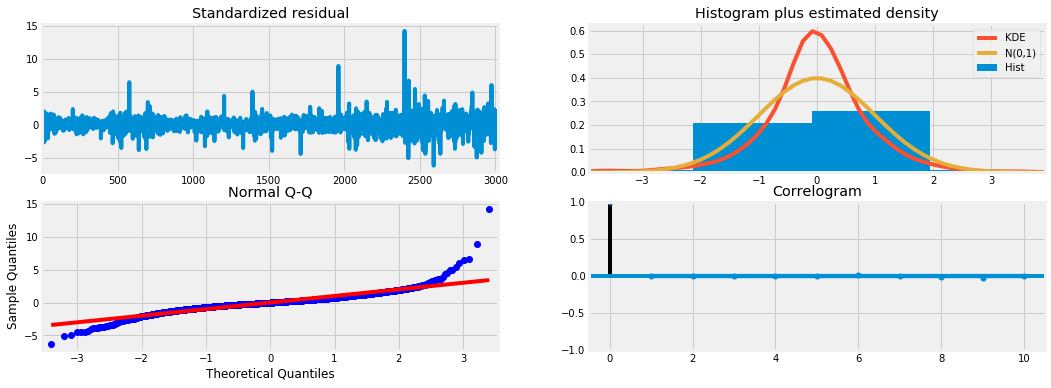

In [204]:
# Predicting closing price of Google'
train_sample = google["Close"].diff().iloc[1:].values
model = sm.tsa.SARIMAX(train_sample,order=(4,0,4),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

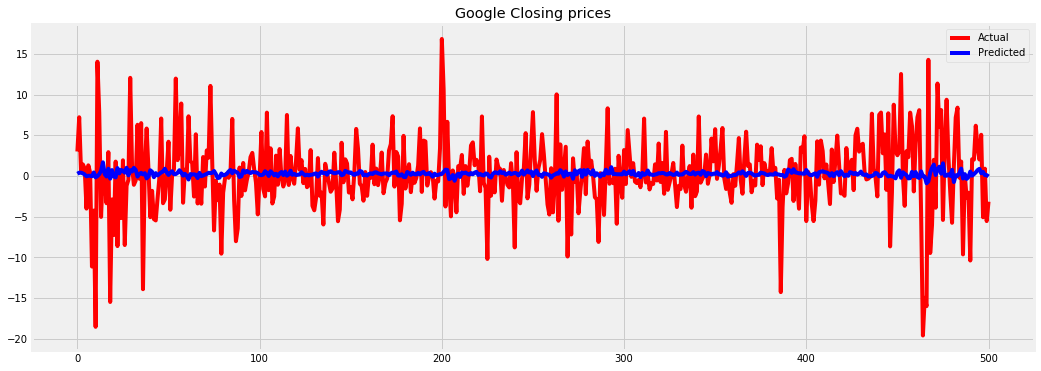

In [206]:
plot.plot(train_sample[1:502],color='red')
plot.plot(predicted_result,color='blue')
plot.legend(['Actual','Predicted'])
plot.title('Google Closing prices')
plot.show()

# 4.6.2 Unobserved components

A UCM decomposes the response series into components such as trend, seasons, cycles, and the regression effects due to predictor series. The following model shows a possible scenario: 

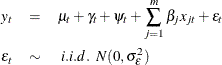

                        Unobserved Components Results                         
Dep. Variable:                      y   No. Observations:                 3018
Model:                    local level   Log Likelihood              -10116.511
Date:                Wed, 30 Jan 2019   AIC                          20237.023
Time:                        23:58:04   BIC                          20249.047
Sample:                             0   HQIC                         20241.347
                               - 3018                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular    47.7219      0.384    124.248      0.000      46.969      48.475
sigma2.level      5.033e-05      0.000      0.458      0.647      -0.000       0.000
Ljung-Box (Q):              

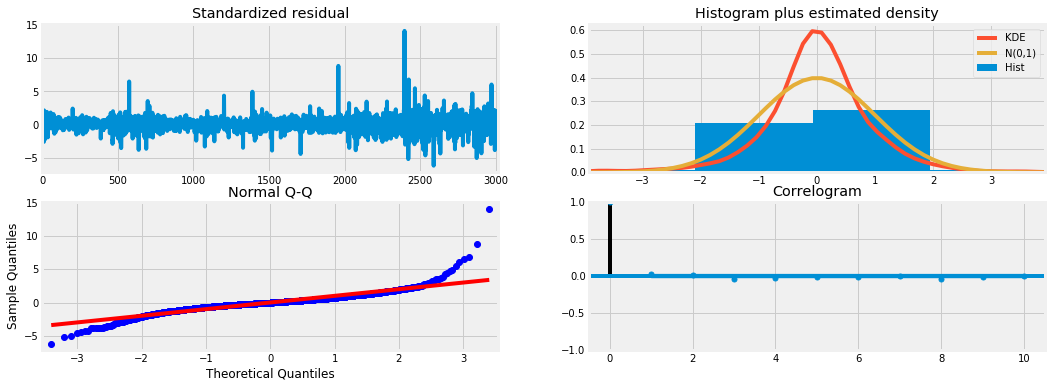

In [209]:
# Predicting closing price of Google'
train_sample = google_stock_data["Close"].diff().iloc[1:].values
model = sm.tsa.UnobservedComponents(train_sample,'local level')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

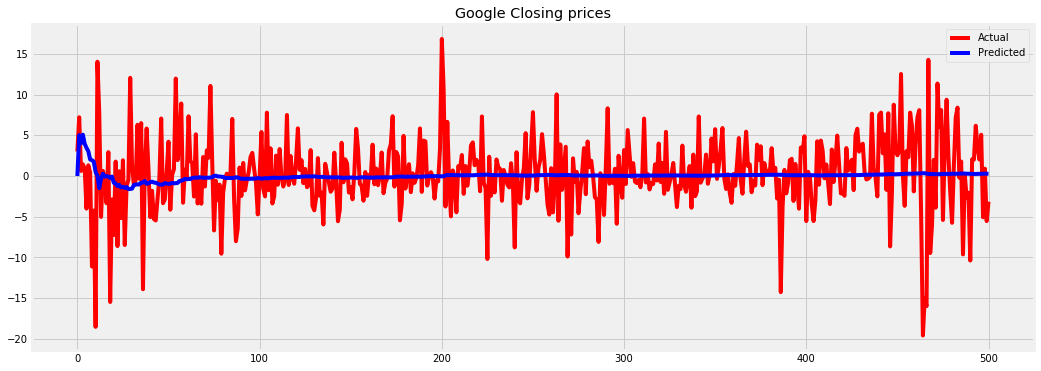

In [211]:
plot.plot(train_sample[1:502],color='red')
plot.plot(predicted_result,color='blue')
plot.legend(['Actual','Predicted'])
plot.title('Google Closing prices')
plot.show()

# 4.6.3 Dynamic Factor models
Dynamic-factor models are flexible models for multivariate time series in which the observed endogenous variables are linear functions of exogenous covariates and unobserved factors, which have a vector autoregressive structure. The unobserved factors may also be a function of exogenous covariates. The disturbances in the equations for the dependent variables may be autocorrelated

                                   Statespace Model Results                                  
Dep. Variable:                    ['Close', 'Close']   No. Observations:                 3018
Model:             DynamicFactor(factors=1, order=2)   Log Likelihood              -12197.974
Date:                               Thu, 31 Jan 2019   AIC                          24407.948
Time:                                       01:37:33   BIC                          24444.022
Sample:                                   01-04-2006   HQIC                         24420.919
                                        - 12-29-2017                                         
Covariance Type:                                 opg                                         
Ljung-Box (Q):                83.69, 69.90   Jarque-Bera (JB):   57146.31, 15484.06
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         3.41, 1.84   Skew:                       1.23, 0

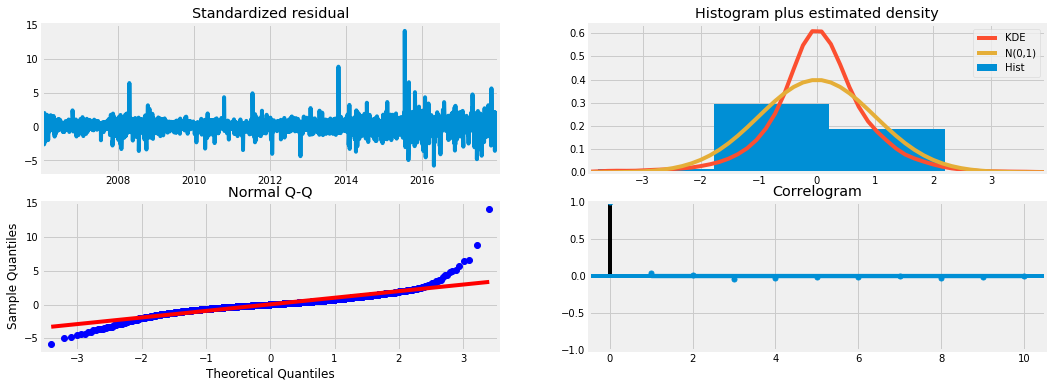

In [213]:
# Predicting closing price of Google and microsoft
train_sample = pd.concat([google_stock_data["Close"].diff().iloc[1:],microsoft_data["Close"].diff().iloc[1:]],axis=1)
model = sm.tsa.DynamicFactor(train_sample, k_factors=1, factor_order=2)
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=1000)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1002].values, predicted_result.values))
print("The root mean squared error is {}.".format(rmse))